# Data Preprocessing Notebook
# This notebook handles the cleaning and preparation of the SciX dataset for modeling.

In [ ]:
"""
Data Preprocessing Notebook
-------------------------

This notebook handles text cleaning and preparation:
1. Text normalization
2. Scientific notation handling
3. Label encoding
4. Data validation

Key Steps:
- Load and validate raw data
- Apply ScientificTextPreprocessor
- Save processed datasets
"""

# Import libraries
import pandas as pd
from datasets import load_dataset
import sys
import os
sys.path.append(os.path.abspath('..'))
from src.data_preprocessing import ScientificTextPreprocessor
import yaml
import matplotlib.pyplot as plt

In [2]:
# Load data
dataset = load_dataset("adsabs/SciX_UAT_keywords")
train_df = pd.DataFrame(dataset['train'])
val_df = pd.DataFrame(dataset['val'])

In [3]:
# Initialize preprocessor
preprocessor = ScientificTextPreprocessor()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adrie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adrie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
# Load preprocessing config
with open('../configs/preprocessing.yaml', 'r') as f:
    preprocess_config = yaml.safe_load(f)

In [5]:
# Example before/after cleaning
sample_text = train_df['abstract'].iloc[0]
print("Original text:\n", sample_text)
print("\nCleaned text:\n", preprocessor.clean_text(sample_text))

Original text:
 Pyroxenes ((Ca, Mg, Fe, Mn)<SUB>2</SUB>Si<SUB>2</SUB>O<SUB>6</SUB>) belong to the most abundant rock forming minerals that make up the surface of rocky planets and moons. Therefore, sputtering of pyroxenes by solar wind ions has to be considered as a very important process for modifying the surface of planetary bodies. This is increased due to potential sputtering by multiply charged ions; to quantify this effect, sputtering of wollastonite (CaSiO<SUB>3</SUB>) by He<SUP>2+</SUP> ions was investigated. Thin films of CaSiO<SUB>3</SUB> deposited on a quartz crystal microbalance were irradiated, allowing precise, in situ, real time sputtering yield measurements. Experimental results were compared with SDTrimSP simulations, which were improved by adapting the used input parameters. On freshly prepared surfaces, He<SUP>2+</SUP> ions show a significant increase in sputtering, as compared to equally fast He<SUP>+</SUP> ions. However, the yield decreases exponentially with fluen

In [6]:
# Process full dataset
train_processed = preprocessor.preprocess_data(train_df)
val_processed = preprocessor.preprocess_data(val_df)

In [7]:
# Save processed data
train_processed.to_parquet('../data/processed/train_processed.parquet')
val_processed.to_parquet('../data/processed/val_processed.parquet')

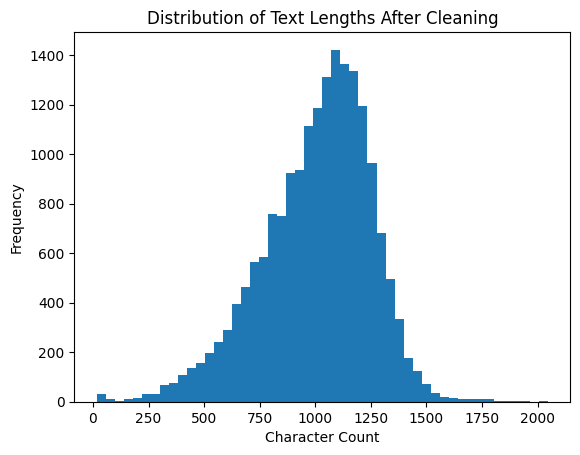

In [8]:
# Visualize text length distribution after cleaning
train_processed['cleaned_length'] = train_processed['cleaned_text'].apply(len)
plt.hist(train_processed['cleaned_length'], bins=50)
plt.title('Distribution of Text Lengths After Cleaning')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Check most common words
from collections import Counter
all_words = ' '.join(train_processed['cleaned_text']).split()
word_counts = Counter(all_words)
word_counts.most_common(20)

[('star', 23402),
 ('mass', 18649),
 ('model', 18223),
 ('galaxy', 17902),
 ('use', 13292),
 ('observation', 12900),
 ('data', 11881),
 ('field', 10903),
 ('emission', 10880),
 ('ray', 10870),
 ('high', 10452),
 ('find', 10222),
 ('solar', 10172),
 ('disk', 10060),
 ('result', 9823),
 ('time', 9754),
 ('stellar', 9472),
 ('magnetic', 9346),
 ('line', 9266),
 ('show', 8435)]